In [17]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


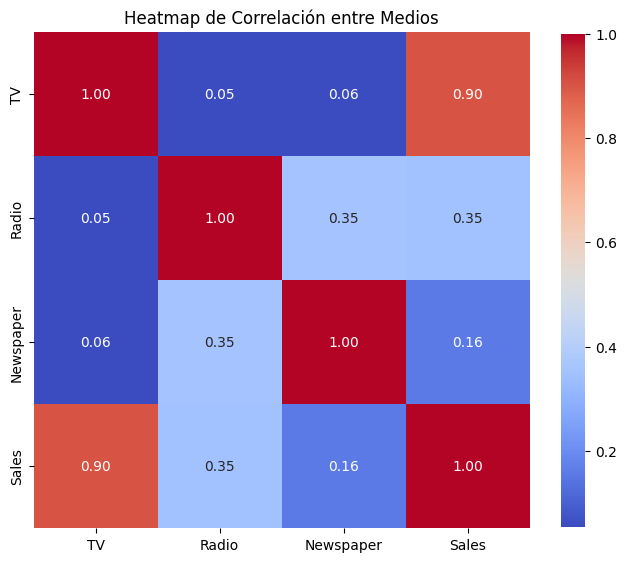

In [3]:
# Creando un heatmap para visualizar la correlación entre las variables

plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap de Correlación entre Medios')
plt.show()

In [18]:
# separando las variables independientes y dependientes
X = data[['TV', 'Radio', 'Newspaper']]
X= sm.add_constant(X)  # Agregar constante para el intercepto
Y = data['Sales']

In [19]:
# separando los datos en entrenamiento y prueba tomando el 70% para entrenamiento y 30% para prueba,
# y usando una semilla para asegurar la reproducibilidad del resultado.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [20]:
X_train_sm = sm.add_constant(X_train)
modelo = sm.OLS(Y_train, X_train_sm).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     405.2
Date:              lun., 28 jul. 2025   Prob (F-statistic):           1.36e-67
Time:                        14:11:10   Log-Likelihood:                -272.35
No. Observations:                 140   AIC:                             552.7
Df Residuals:                     136   BIC:                             564.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6614      0.368     12.650      0.0

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Entrenando el modelo de regresión lineal
modelo_sklearn = LinearRegression().fit(X_train, Y_train)
Y_pred = modelo_sklearn.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Error Cuadratico Medio: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Error Cuadratico Medio: 2.37
R^2 Score: 0.91


In [12]:
nuevos_datos = pd.DataFrame({'const': [1],'TV': [100], 'Radio': [50], 'Newspaper': [70]})
nuevos_datos_sm = sm.add_constant(nuevos_datos)

In [22]:
# Obtener predicción e intervalo de confianza
pred_result = modelo.get_prediction(nuevos_datos)
intervalo = pred_result.conf_int(alpha=0.10)

# Extraer los valores mínimo y máximo del intervalo
min_val = round(intervalo[0][0], 2)
max_val = round(intervalo[0][1], 2)

# Mostrar en formato solicitado
print(f"Intervalo de confianza del 90%: \"{min_val} --- {max_val}\"")

Intervalo de confianza del 90%: "14.59 --- 15.78"


In [ ]:
import scipy.stats as stats
import statsmodels.stats.diagnostic as sms

residuos = modelo.resid
X_sm = modelo.model.exog

# Sesgo y curtosis
sesgo = stats.skew(residuos)
curtosis = stats.kurtosis(residuos)
print(f"Sesgo: {sesgo:.2f}")
print(f"Curtosis: {curtosis:.2f}")

# Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuos)
print(f"Durbin-Watson: {dw:.2f}")

# Heterocedasticidad de White
white_test = sms.het_white(residuos, X_sm)
print(f"White Test p-value: {white_test[1]:.4f}")

Sesgo: -0.53
Curtosis: 1.82
Durbin-Watson: 2.04
White Test p-value: 0.0332


In [24]:
# Sesgo manual
def sesgo_manual(x):
    n = len(x)
    media = np.mean(x)
    std_dev = np.std(x, ddof=0)
    return np.sum((x - media)**3) / (n * std_dev**3)

# Curtosis manual
def curtosis_manual(x):
    n = len(x)
    media = np.mean(x)
    std_dev = np.std(x, ddof=0)
    return np.sum((x - media)**4) / (n * std_dev**4)

print(f"Sesgo (manual): {sesgo_manual(residuos):.2f}")
print(f"Curtosis (manual): {curtosis_manual(residuos):.2f}")

Sesgo (manual): -0.53
Curtosis (manual): 4.82
